In [ ]:
!pip install opencv-contrib-python
!pip install numpy
!pip install scikit-learn
!pip install scikit-image
!pip install imutils
!pip install matplotlib kaggle
!pip install tensorflow
%matplotlib inline

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "newt0n" # username from the json file
os.environ['KAGGLE_KEY'] = "c983a30d588714d01aec2bcc18c91112" # key from the json file
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset # api copied from kaggle
!unzip -qq covid-face-mask-detection-dataset.zip
!rm -r covid-face-mask-detection-dataset.zip

 98% 203M/207M [00:02<00:00, 68.8MB/s]
100% 207M/207M [00:02<00:00, 73.1MB/s]


In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Conv2D, MaxPooling2D , Dropout , Flatten , Dense 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

In [ ]:
main_dir = "/content/New Masks Dataset"
train_dir = "/content/New Masks Dataset/Train"
test_dir = "/content/New Masks Dataset/Test"
valid_dir = "/content/New Masks Dataset/Validation"
 
train_mask_dir = os.path.join(train_dir,"Mask")
train_nonmask_dir = os.path.join(train_dir,"Non Mask")

In [ ]:
train_mask_name = os.listdir(train_mask_dir)
print(train_mask_name[:20])
 
train_nonmask_name = os.listdir(train_nonmask_dir)
print(train_nonmask_name[:20])

['0951.jpg', '0746.jpg', '0505.jpg', '1568.jpg', '0211.jpg', '1112.jpg', '1664.jpg', '1523.jpg', '0972.jpg', '0655.jpg', '0216.jpg', '0415.jpg', '1490.jpg', '0566.jpg', '0650.jpg', '0888.jpg', '0202.jpg', '1109.jpg', '0750.jpg', '0481.jpg']
['50.jpg', '108.jpg', '104.jpg', '260.jpg', '214.jpg', '124.jpg', '64.jpg', '168.jpg', '145.jpg', '63.jpg', '16.jpg', '105.jpg', '175.jpg', '148.jpg', '203.jpg', '166.jpg', '298.jpg', '99.jpg', '109.jpg', '88.jpg']


['/content/New Masks Dataset/Train/Mask/0951.jpg', '/content/New Masks Dataset/Train/Mask/0746.jpg', '/content/New Masks Dataset/Train/Mask/0505.jpg', '/content/New Masks Dataset/Train/Mask/1568.jpg', '/content/New Masks Dataset/Train/Mask/0211.jpg', '/content/New Masks Dataset/Train/Mask/1112.jpg', '/content/New Masks Dataset/Train/Mask/1664.jpg', '/content/New Masks Dataset/Train/Mask/1523.jpg', '/content/New Masks Dataset/Train/Mask/0972.jpg', '/content/New Masks Dataset/Train/Mask/0655.jpg']
['/content/New Masks Dataset/Train/Non Mask/50.jpg', '/content/New Masks Dataset/Train/Non Mask/108.jpg', '/content/New Masks Dataset/Train/Non Mask/104.jpg', '/content/New Masks Dataset/Train/Non Mask/260.jpg', '/content/New Masks Dataset/Train/Non Mask/214.jpg', '/content/New Masks Dataset/Train/Non Mask/124.jpg', '/content/New Masks Dataset/Train/Non Mask/64.jpg', '/content/New Masks Dataset/Train/Non Mask/168.jpg', '/content/New Masks Dataset/Train/Non Mask/145.jpg', '/content/New Masks Dat

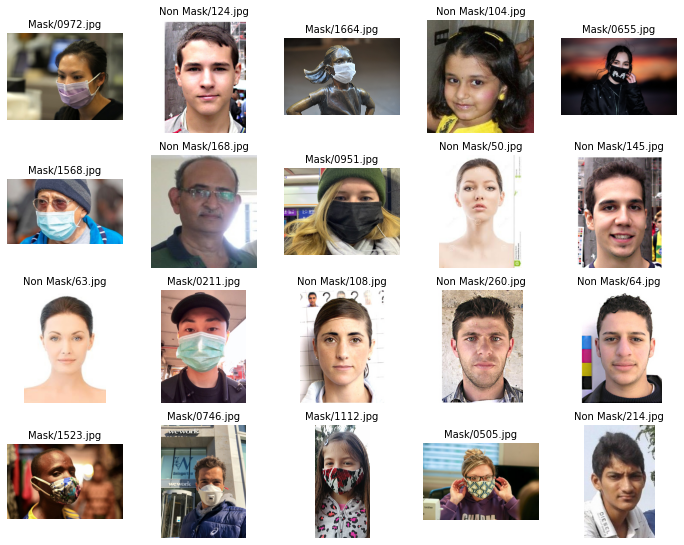

(428, 320, 3)

In [ ]:
import random
nrows = 5
ncols = 5
plt.figure(figsize=(12,12))
 
mask_pic=[]
for i in train_mask_name[0:10]:
    mask_pic.append(os.path.join(train_mask_dir,i))
    
nonmask_pic = []    
for i in train_nonmask_name[0:10]:
    nonmask_pic.append(os.path.join(train_nonmask_dir,i))
    
print(mask_pic)
print(nonmask_pic)
 
merge_list = mask_pic+nonmask_pic
random.shuffle(merge_list)
for i in range(0 , len(merge_list)):
    data=merge_list[i].split('/',4)[4]
    sp = plt.subplot(nrows,ncols,i+1)
    sp.axis('Off')
    image = mpimg.imread(merge_list[i])
    sp.set_title(data,fontsize = 10)
    plt.imshow(image,cmap='gray')
    
plt.show()    
image=mpimg.imread(merge_list[1])
image.shape

In [ ]:
 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  zoom_range = 0.1,
                                  rotation_range=39,
                                  horizontal_flip=True,
                                  vertical_flip=False,
                                  )
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
 
train_datagen = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(200,200),
                                                 batch_size =36 , #how much image is insert at a time
                                                 class_mode='binary'#what type of classification is
                                                 )
 
test_datagen = test_datagen.flow_from_directory(test_dir,
                                                 target_size=(200,200),
                                                 batch_size =36 , #how much image is insert at a time
                                                 class_mode='binary'#what type of classification is
                                                 )
 
valid_datagen = valid_datagen.flow_from_directory(valid_dir,
                                                 target_size=(200,200),
                                                 batch_size =36 , #how much image is insert at a time
                                                 class_mode='binary'#what type of classification is
                                                 )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
train_datagen.class_indices

{'Mask': 0, 'Non Mask': 1}

In [ ]:
from tensorflow.keras.applications.inception_v3 import  *
first=InceptionV3(input_shape=(200,200,3),include_top=False,weights='imagenet')
for layer in first.layers:
  layer.trainable=False

In [ ]:
x=layers.Flatten()(first.output)
x=layers.Dense(250,activation='relu')(x)
x=layers.Dropout(0.5)(x)
x=layers.Dense(1,activation='sigmoid')(x)

model = models.Model(first.input,x)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d_472 (Conv2D)             (None, 99, 99, 32)   864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_470 (BatchN (None, 99, 99, 32)   96          conv2d_472[0][0]                 
__________________________________________________________________________________________________
activation_470 (Activation)     (None, 99, 99, 32)   0           batch_normalization_470[0][0]    
______________________________________________________________________________________________

In [ ]:
'''
model= Sequential()
model.add(first.output)
#model.add(Conv2D(32,(3,3),padding = 'SAME', activation='relu', input_shape = (200,200,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
 
model.add(Conv2D(64,(3,3),padding = 'SAME', activation='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
 
model.add(Conv2D(128,(3,3),padding = 'SAME', activation='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(250,activation= 'relu'))
 
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()
'''


"model= Sequential()\nmodel.add(Conv2D(32,(3,3),padding = 'SAME', activation='relu', input_shape = (200,200,3)))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.4))\n \n \nmodel.add(Conv2D(64,(3,3),padding = 'SAME', activation='relu', input_shape = (150,150,3)))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.4))\n \n \nmodel.add(Conv2D(128,(3,3),padding = 'SAME', activation='relu', input_shape = (150,150,3)))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\nmodel.add(Dropout(0.4))\n \nmodel.add(Flatten())\nmodel.add(Dense(250,activation= 'relu'))\n \nmodel.add(Dropout(0.5))\nmodel.add(Dense(1,activation='sigmoid'))"

In [ ]:
model.compile(Adam(lr=0.001),
              loss='binary_crossentropy'
              ,metrics='accuracy')

In [ ]:
history=model.fit(train_datagen,
                 epochs=30,
                 validation_data=valid_datagen
                 )
 
N = np.arange(0, 30)

Epoch 1/30
17/17 [==============================] - 79s 4s/step - loss: 6.8330 - accuracy: 0.6919 - val_loss: 0.4917 - val_accuracy: 0.9739
Epoch 2/30
17/17 [==============================] - 73s 4s/step - loss: 0.5686 - accuracy: 0.9629 - val_loss: 0.8677 - val_accuracy: 0.9575
Epoch 3/30
17/17 [==============================] - 73s 4s/step - loss: 1.3389 - accuracy: 0.9620 - val_loss: 0.3574 - val_accuracy: 0.9739
Epoch 4/30
17/17 [==============================] - 73s 4s/step - loss: 0.2242 - accuracy: 0.9739 - val_loss: 0.2200 - val_accuracy: 0.9869
Epoch 5/30
17/17 [==============================] - 73s 4s/step - loss: 0.2486 - accuracy: 0.9819 - val_loss: 0.4230 - val_accuracy: 0.9608
Epoch 6/30
17/17 [==============================] - 73s 4s/step - loss: 0.1471 - accuracy: 0.9902 - val_loss: 0.1875 - val_accuracy: 0.9869
Epoch 7/30
17/17 [==============================] - 73s 4s/step - loss: 0.3325 - accuracy: 0.9773 - val_loss: 0.2400 - val_accuracy: 0.9673
Epoch 8/30
17/17 [==

In [ ]:
model.save("/content/drive/MyDrive/Colab Notebooks/model.h5")

Text(0.5, 0, 'epoch')

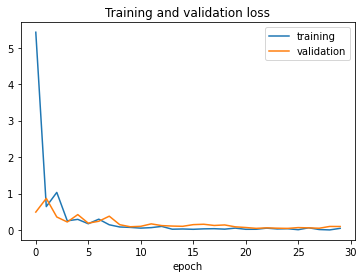

In [ ]:
plt.plot(N,history.history['loss'])
plt.plot(N,history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.save("Loss.png")

Text(0.5, 0, 'epoch')

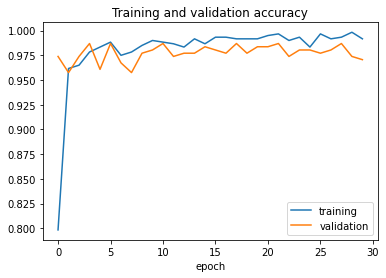

In [ ]:
plt.plot(N,history.history['accuracy'])
plt.plot(N,history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')
plt.save("Accuracy.png")

In [ ]:
test_loss , test_acc = model.evaluate(test_datagen)

3/3 [==============================] - 10s 2s/step - loss: 0.0420 - accuracy: 0.9900


In [ ]:
print(test_loss)
print(test_acc)

NameError: ignored

In [ ]:
#if you want to upload
import numpy as np
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

KeyboardInterrupt: ignored